In [50]:
import pandas as var_pandas
import numpy as var_numpy
import matplotlib.pyplot as var_pyplot
import math as var_math
from sklearn import linear_model as var_linear_model
from sklearn import preprocessing as var_preprocessing
from sklearn import compose as var_compose

In [51]:
train_df = var_pandas.read_csv("../data/cbex-dvlr-car-prices-train.csv")
train_df

,model,mileage,price,age
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


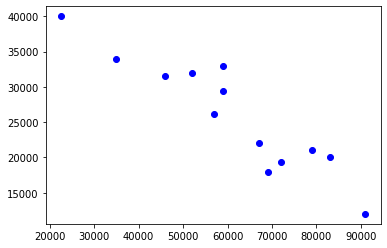

In [52]:
%matplotlib inline
var_pyplot.xlabel='mileage'
var_pyplot.ylabel='price'
var_pyplot.scatter(train_df.mileage, train_df.price, color='blue', marker='o')

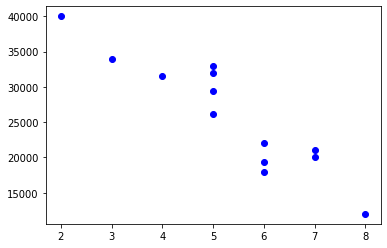

In [53]:
%matplotlib inline
var_pyplot.xlabel='age'
var_pyplot.ylabel='price'
var_pyplot.scatter(train_df.age, train_df.price, color='blue', marker='o')

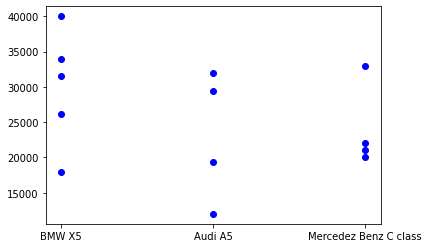

In [54]:
%matplotlib inline
var_pyplot.xlabel='model'
var_pyplot.ylabel='price'
var_pyplot.scatter(train_df.model, train_df.price, color='blue', marker='o')

In [55]:
dummies = var_pandas.get_dummies(train_df.model)
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [56]:
dummied_train_df = var_pandas.concat([train_df,dummies],axis='columns')
dummied_train_df

,model,mileage,price,age,Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [57]:
dummied_train_df = dummied_train_df.rename(columns= {
    "Audi A5" : "audi_a5",
    "BMW X5"  : "bmw_x5",
    "Mercedez Benz C class" : "merc_benz_c"
})
dummied_train_df

,model,mileage,price,age,audi_a5,bmw_x5,merc_benz_c
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [58]:
dummied_train_df = dummied_train_df.drop(['model', 'audi_a5'], axis='columns')
dummied_train_df

,mileage,price,age,bmw_x5,merc_benz_c
0,69000,18000,6,1,0
1,35000,34000,3,1,0
2,57000,26100,5,1,0
3,22500,40000,2,1,0
4,46000,31500,4,1,0
5,59000,29400,5,0,0
6,52000,32000,5,0,0
7,72000,19300,6,0,0
8,91000,12000,8,0,0
9,67000,22000,6,0,1


In [59]:
dummied_train_inputs = dummied_train_df.drop(['price'], axis='columns')
dummied_train_inputs

,mileage,age,bmw_x5,merc_benz_c
0,69000,6,1,0
1,35000,3,1,0
2,57000,5,1,0
3,22500,2,1,0
4,46000,4,1,0
5,59000,5,0,0
6,52000,5,0,0
7,72000,6,0,0
8,91000,8,0,0
9,67000,6,0,1


In [60]:
dummied_train_outputs = dummied_train_df.price
dummied_train_outputs

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: price, dtype: int64

In [61]:
dummied_model  = var_linear_model.LinearRegression()
dummied_model.fit(X=dummied_train_inputs, y=dummied_train_outputs)
dummied_model

LinearRegression()

In [62]:
oh_encoder = var_preprocessing.OneHotEncoder()
column_transformer = var_compose.make_column_transformer((oh_encoder, ['model']), remainder='passthrough')

oh_encoded_train_df = train_df
transformed_data = column_transformer.fit_transform(oh_encoded_train_df)
transformed_data

array([[0.00e+00, 1.00e+00, 0.00e+00, 6.90e+04, 1.80e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.50e+04, 3.40e+04, 3.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.70e+04, 2.61e+04, 5.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.25e+04, 4.00e+04, 2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.60e+04, 3.15e+04, 4.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.90e+04, 2.94e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.20e+04, 3.20e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 7.20e+04, 1.93e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 9.10e+04, 1.20e+04, 8.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 6.70e+04, 2.20e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.30e+04, 2.00e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 7.90e+04, 2.10e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 5.90e+04, 3.30e+04, 5.00e+00]])

In [63]:
oh_encoded_train_df = var_pandas.DataFrame(transformed_data, columns=column_transformer.get_feature_names_out())
oh_encoded_train_df

,onehotencoder__model_Audi A5,onehotencoder__model_BMW X5,onehotencoder__model_Mercedez Benz C class,remainder__mileage,remainder__price,remainder__age
0,0.0,1.0,0.0,69000.0,18000.0,6.0
1,0.0,1.0,0.0,35000.0,34000.0,3.0
2,0.0,1.0,0.0,57000.0,26100.0,5.0
3,0.0,1.0,0.0,22500.0,40000.0,2.0
4,0.0,1.0,0.0,46000.0,31500.0,4.0
5,1.0,0.0,0.0,59000.0,29400.0,5.0
6,1.0,0.0,0.0,52000.0,32000.0,5.0
7,1.0,0.0,0.0,72000.0,19300.0,6.0
8,1.0,0.0,0.0,91000.0,12000.0,8.0
9,0.0,0.0,1.0,67000.0,22000.0,6.0


In [64]:
oh_encoded_train_df = oh_encoded_train_df.rename( columns = {
    "onehotencoder__model_Audi A5" : "audi_a5", 
    "onehotencoder__model_BMW X5" : "bmw_x5", 
    "onehotencoder__model_Mercedez Benz C class" : "merc_benz_c",
    "remainder__mileage" : "mileage",
    "remainder__age" : "age",
    "remainder__price" : "price"}
)
oh_encoded_train_df

,audi_a5,bmw_x5,merc_benz_c,mileage,price,age
0,0.0,1.0,0.0,69000.0,18000.0,6.0
1,0.0,1.0,0.0,35000.0,34000.0,3.0
2,0.0,1.0,0.0,57000.0,26100.0,5.0
3,0.0,1.0,0.0,22500.0,40000.0,2.0
4,0.0,1.0,0.0,46000.0,31500.0,4.0
5,1.0,0.0,0.0,59000.0,29400.0,5.0
6,1.0,0.0,0.0,52000.0,32000.0,5.0
7,1.0,0.0,0.0,72000.0,19300.0,6.0
8,1.0,0.0,0.0,91000.0,12000.0,8.0
9,0.0,0.0,1.0,67000.0,22000.0,6.0


In [65]:
oh_encoded_train_df = oh_encoded_train_df.drop(['audi_a5'], axis='columns')
oh_encoded_train_df

,bmw_x5,merc_benz_c,mileage,price,age
0,1.0,0.0,69000.0,18000.0,6.0
1,1.0,0.0,35000.0,34000.0,3.0
2,1.0,0.0,57000.0,26100.0,5.0
3,1.0,0.0,22500.0,40000.0,2.0
4,1.0,0.0,46000.0,31500.0,4.0
5,0.0,0.0,59000.0,29400.0,5.0
6,0.0,0.0,52000.0,32000.0,5.0
7,0.0,0.0,72000.0,19300.0,6.0
8,0.0,0.0,91000.0,12000.0,8.0
9,0.0,1.0,67000.0,22000.0,6.0


In [66]:
oh_encoded_train_df = oh_encoded_train_df.reindex(columns=['mileage','price','age','bmw_x5', 'merc_benz_c'])
oh_encoded_train_df

,mileage,price,age,bmw_x5,merc_benz_c
0,69000.0,18000.0,6.0,1.0,0.0
1,35000.0,34000.0,3.0,1.0,0.0
2,57000.0,26100.0,5.0,1.0,0.0
3,22500.0,40000.0,2.0,1.0,0.0
4,46000.0,31500.0,4.0,1.0,0.0
5,59000.0,29400.0,5.0,0.0,0.0
6,52000.0,32000.0,5.0,0.0,0.0
7,72000.0,19300.0,6.0,0.0,0.0
8,91000.0,12000.0,8.0,0.0,0.0
9,67000.0,22000.0,6.0,0.0,1.0


In [67]:
oh_encoded_train_inputs = oh_encoded_train_df.drop(['price'], axis='columns')
oh_encoded_train_inputs

,mileage,age,bmw_x5,merc_benz_c
0,69000.0,6.0,1.0,0.0
1,35000.0,3.0,1.0,0.0
2,57000.0,5.0,1.0,0.0
3,22500.0,2.0,1.0,0.0
4,46000.0,4.0,1.0,0.0
5,59000.0,5.0,0.0,0.0
6,52000.0,5.0,0.0,0.0
7,72000.0,6.0,0.0,0.0
8,91000.0,8.0,0.0,0.0
9,67000.0,6.0,0.0,1.0


In [68]:
oh_encoded_train_outputs = oh_encoded_train_df.price
oh_encoded_train_outputs

0     18000.0
1     34000.0
2     26100.0
3     40000.0
4     31500.0
5     29400.0
6     32000.0
7     19300.0
8     12000.0
9     22000.0
10    20000.0
11    21000.0
12    33000.0
Name: price, dtype: float64

In [69]:
oh_model = var_linear_model.LinearRegression()
oh_model.fit(X=oh_encoded_train_inputs, y=oh_encoded_train_outputs)
oh_model

LinearRegression()

In [70]:
dummied_model_score = dummied_model.score(X=dummied_train_inputs, y=dummied_train_outputs)
oh_model_score = oh_model.score(X=oh_encoded_train_inputs, y=oh_encoded_train_outputs)

In [71]:
print ("=== Trained Model Outuputs ===")
print ("Dummy  : Coefficients = {}, Intercept = {}, Score = {}".format(dummied_model.coef_, dummied_model.intercept_, dummied_model_score))
print ("OneHot : Coefficients = {}, Intercept = {}, Score = {}".format(oh_model.coef_, oh_model.intercept_, oh_model_score))

=== Trained Model Outuputs ===
Dummy  : Coefficients = [-3.70122094e-01 -1.33245363e+03 -4.28466659e+03  2.45354074e+03], Intercept = 56523.085231274956, Score = 0.9417050937281083
OneHot : Coefficients = [-3.70122094e-01 -1.33245363e+03 -4.28466659e+03  2.45354074e+03], Intercept = 56523.085231274956, Score = 0.9417050937281083


In [72]:
test_df = var_pandas.read_csv("../data/cbex-dvlr-car-prices-test.csv")
test_df.head(5)

,mileage,age,bmw_x5,merc_benz_c
0,45000,4,0,1
1,86000,7,1,0


In [73]:
predicted_prices_dummied = dummied_model.predict(test_df)
predicted_prices_oh = oh_model.predict(test_df)

test_df['predicted_price_dummied'] = predicted_prices_dummied
test_df['predicted_price_oh'] = predicted_prices_oh
test_df.to_csv("../.outputs/.predictions/cbex-dvlr-car-prices-predictions.csv", index=False)
test_df

,mileage,age,bmw_x5,merc_benz_c,predicted_price_dummied,predicted_price_oh
0,45000,4,0,1,36991.317211,36991.317211
1,86000,7,1,0,11080.743132,11080.743132
